In [1]:
# Run in python console
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
!pip install --user pip setuptools wheel
!pip install -U spacy

In [2]:
! pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=071bf806109c08cdfa6d54eb89eee0bfec7ff40d346127cbe3e0e90ab6d696d6
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=701a1af37438b7a2e7dac7192710257c17b5393420c0a76d62a1cbb219aeb3d6
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully b

In [3]:
!pip install pyLDAvis==2.1.2


  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=a4328c0b9d8548958b8ad28e6011074b5e2ebb7dd9a263ce3dd51667dc6b501d
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\59\70\ee\99a0df99d8b4a7b87c79640ebee0927c0f6ccff046e9cc2471
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [4]:
!pip install -U gensim
!pip install pyLDAvis==2.1.2
!pip install spacy


  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    Uninstalling smart-open-6.0.0:
      Successfully uninstalled smart-open-6.0.0


In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\asus\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\asus\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\asus\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Loos

In [3]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [4]:
df= pd.read_csv(r"C:\Users\asus\Desktop\Hotels\Mumbai\5 star\taj post.csv", encoding = 'latin1')
df = df.dropna()
df


,Unnamed: 0,Name,Profile url,Review,Review url,Detailed Review,Stay Date,Rating
0,0.0,Prasad Shigwan,https://www.tripadvisor.in//Profile/Prasadshigwan,Mr. Ameya - Amazing service,https://www.tripadvisor.in//ShowUserReviews-g3...,Mr. Ameya is very good. Provided amazing servi...,22-Jul,5.0
1,1.0,Kaushik DasGupta,https://www.tripadvisor.in//Profile/dasguptaka...,Excellent evening at the Atrium,https://www.tripadvisor.in//ShowUserReviews-g3...,Had an excellent time at the Atrium at Taj Lan...,22-Jul,5.0
2,2.0,Shraddha T,https://www.tripadvisor.in//Profile/438shraddhat,Luxurious at its best,https://www.tripadvisor.in//ShowUserReviews-g3...,Best place with excellent Hospitality. Had vi...,22-Jul,5.0
3,3.0,POOJA D,https://www.tripadvisor.in//Profile/poojad776,Felt Pampered and overwhelming services overall .,https://www.tripadvisor.in//ShowUserReviews-g3...,"An amazing stay at this property , from check ...",22-Jul,5.0
4,4.0,Hicham,https://www.tripadvisor.in//Profile/Hichamlg,Good housekeepping,https://www.tripadvisor.in//ShowUserReviews-g3...,I m staying in this room 1704 For 14day is n...,22-Jul,5.0
...,...,...,...,...,...,...,...,...
1224,1246.0,afiiiiii,https://www.tripadvisor.in//Profile/afiiiii,The view,https://www.tripadvisor.in//ShowUserReviews-g3...,The staff nd services were awsomee ...rooms we...,19-Jan,4.0
1225,1247.0,Devil K,https://www.tripadvisor.in//Profile/872devilk,Awesome people from Mumbai,https://www.tripadvisor.in//ShowUserReviews-g3...,Excellent in a 360o point of view. The hotel h...,19-Jan,5.0
1226,1251.0,Debyani S,https://www.tripadvisor.in//Profile/DebyaniS,Mind blowing property & service,https://www.tripadvisor.in//ShowUserReviews-g3...,"Must stay and experience ""place"". Awesome fac...",19-Jan,5.0
1227,1253.0,doscal,https://www.tripadvisor.in//Profile/doscal,Looks fantastic...,https://www.tripadvisor.in//ShowUserReviews-g3...,Visited one of its restaurants... ming yang.. ...,19-Jan,5.0


In [5]:
df.columns.values


array(['Unnamed: 0', 'Name', 'Profile url', 'Review', 'Review url',
       'Detailed Review', 'Stay Date', 'Rating'], dtype=object)

In [6]:
data = df['Detailed Review'].tolist()


In [7]:
data

['Mr. Ameya is very good. Provided amazing service. Very calm and focused person. Very cool personality. Very polite in nature. He was pretty quick.  Good service. Very nice to talk. Polite.  Regards, Prasad',
 'Had an excellent time at the Atrium at Taj Lands End. The choice of drinks and snacks are excellent. The service as always is top class - all thanks to Ritu for an excellent evening. Her attention and service made it a memorable meal.',
 'Best place with excellent Hospitality.  Had visited the property yesterday. Room was excellent and all our requests were taken care. Staff is well trained. Ankush from front office and Neha from reservations took care of our stay brilliantly. Thank you so much',
 'An amazing stay at this property , from check in to check out daily have experienced something new from the lovely notes left in room by clifford and Trisha .. to small gesture by room service people to making up room so well by keeping my charger wire tied to a clip it was like you 

In [8]:


# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Mr. Ameya is very good. Provided amazing service. Very calm and focused '
 'person. Very cool personality. Very polite in nature. He was pretty quick. '
 'Good service. Very nice to talk. Polite. Regards, Prasad']


In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['mr', 'ameya', 'is', 'very', 'good', 'provided', 'amazing', 'service', 'very', 'calm', 'and', 'focused', 'person', 'very', 'cool', 'personality', 'very', 'polite', 'in', 'nature', 'he', 'was', 'pretty', 'quick', 'good', 'service', 'very', 'nice', 'to', 'talk', 'polite', 'regards', 'prasad']]


In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['mr', 'ameya', 'is', 'very', 'good', 'provided', 'amazing', 'service', 'very', 'calm', 'and', 'focused', 'person', 'very', 'cool', 'personality', 'very', 'polite', 'in', 'nature', 'he', 'was', 'pretty', 'quick', 'good', 'service', 'very', 'nice', 'to', 'talk', 'polite', 'regards', 'prasad']


In [11]:
import spacy

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

In [12]:
!python -m venv .env
source .env/bin/activate
!pip install -U pip setuptools wheel
!pip install -U spacy

NameError: name 'source' is not defined

In [13]:
!python3 -m spacy download en

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [14]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['provide', 'amazing', 'service', 'calm', 'focus', 'person', 'cool', 'personality', 'polite', 'nature', 'pretty', 'quick', 'good', 'service', 'nice', 'talk', 'polite', 'regard', 'prasad']]


In [16]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1)]]


In [17]:
dictionary = corpora.Dictionary(data_lemmatized)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data_lemmatized]

In [18]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=6, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [19]:
lda_model.print_topics()


[(0,
  '0.013*"many" + 0.013*"hotel" + 0.012*"excellent" + 0.011*"service" + 0.010*"try" + 0.010*"mumbai" + 0.009*"year" + 0.007*"location" + 0.007*"place" + 0.007*"restaurant"'),
 (1,
  '0.047*"room" + 0.030*"hotel" + 0.025*"good" + 0.023*"view" + 0.022*"staff" + 0.020*"stay" + 0.018*"service" + 0.014*"great" + 0.014*"breakfast" + 0.013*"well"'),
 (2,
  '0.025*"food" + 0.019*"service" + 0.019*"good" + 0.017*"time" + 0.015*"great" + 0.010*"lounge" + 0.010*"attend" + 0.009*"place" + 0.009*"area" + 0.009*"need"'),
 (3,
  '0.032*"stay" + 0.023*"thank" + 0.023*"make" + 0.021*"service" + 0.021*"staff" + 0.017*"good" + 0.016*"hotel" + 0.015*"special" + 0.014*"food" + 0.013*"team"'),
 (4,
  '0.017*"hotel" + 0.017*"service" + 0.014*"stay" + 0.011*"good" + 0.011*"guest" + 0.010*"property" + 0.010*"staff" + 0.008*"family" + 0.007*"time" + 0.006*"business"'),
 (5,
  '0.046*"room" + 0.016*"check" + 0.015*"hotel" + 0.013*"call" + 0.012*"get" + 0.010*"take" + 0.010*"time" + 0.010*"ask" + 0.010*"nigh

In [20]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\asus\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.124557 -0.117284       1        1  35.333812
1     -0.125185 -0.054757       2        1  33.236747
5     -0.079937  0.219673       3        1  11.687887
4      0.026988  0.020643       4        1   9.535882
2      0.097120 -0.088285       5        1   5.761920
0      0.205570  0.020011       6        1   4.443753, topic_info=        Term        Freq       Total Category  logprob  loglift
44      room  913.000000  913.000000  Default  30.0000  30.0000
68      food  395.000000  395.000000  Default  29.0000  29.0000
30     thank  329.000000  329.000000  Default  28.0000  28.0000
134    great  365.000000  365.000000  Default  27.0000  27.0000
183  special  204.000000  204.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
42   request    8.085293   84.477906   Topic6  -5.3550   0.7672
97    people    7.780672   65.420966   Topic6  -5.3934   0.9845
445     long    7.044988   53.831441   Topic6  -5.4927   1.0801
50     visit    7.228404  240.675524   Topic6  -5.4670  -0.3918
326      way    7.109411   94.724468   Topic6  -5.4836   0.5241

[446 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1922      1  0.394962   actually
1922      6  0.592443   actually
1576      1  0.372885      adult
1576      5  0.596616      adult
500       2  0.425034  afternoon
...     ...       ...        ...
173       2  0.058509       year
173       3  0.234037       year
173       4  0.190155       year
173       6  0.219410       year
507       4  0.871138       youa

[734 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 6, 5, 3, 1])

In [21]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.6906322215174105

Coherence Score:  0.3689141985191622


In [22]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [23]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=data_lemmatized, start=2, limit=50, step=1)


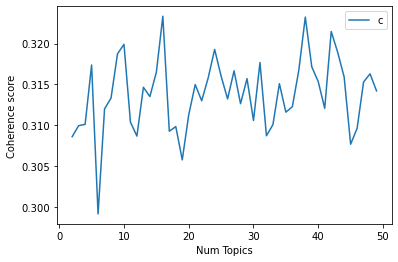

In [24]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [25]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3086
Num Topics = 3  has Coherence Value of 0.3099
Num Topics = 4  has Coherence Value of 0.3101
Num Topics = 5  has Coherence Value of 0.3174
Num Topics = 6  has Coherence Value of 0.2991
Num Topics = 7  has Coherence Value of 0.312
Num Topics = 8  has Coherence Value of 0.3133
Num Topics = 9  has Coherence Value of 0.3187
Num Topics = 10  has Coherence Value of 0.3199
Num Topics = 11  has Coherence Value of 0.3104
Num Topics = 12  has Coherence Value of 0.3087
Num Topics = 13  has Coherence Value of 0.3146
Num Topics = 14  has Coherence Value of 0.3135
Num Topics = 15  has Coherence Value of 0.3165
Num Topics = 16  has Coherence Value of 0.3234
Num Topics = 17  has Coherence Value of 0.3093
Num Topics = 18  has Coherence Value of 0.3098
Num Topics = 19  has Coherence Value of 0.3058
Num Topics = 20  has Coherence Value of 0.3113
Num Topics = 21  has Coherence Value of 0.315
Num Topics = 22  has Coherence Value of 0.313
Num Topics = 23  has Coh

In [26]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words= 5)

[(0,
  '0.033*"room" + 0.020*"staff" + 0.020*"stay" + 0.018*"good" + 0.017*"hotel"'),
 (1,
  '0.024*"stay" + 0.017*"staff" + 0.015*"service" + 0.013*"room" + 0.012*"hotel"'),
 (2,
  '0.019*"room" + 0.017*"hotel" + 0.016*"food" + 0.015*"service" + 0.013*"stay"'),
 (3,
  '0.028*"service" + 0.024*"room" + 0.022*"good" + 0.019*"stay" + 0.018*"hotel"')]

In [27]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

C:\Users\asus\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.017116  0.025113       1        1  35.860552
3      0.012410 -0.020160       2        1  33.942247
1      0.005936 -0.008583       3        1  19.411838
2     -0.035462  0.003630       4        1  10.785363, topic_info=           Term        Freq       Total Category  logprob  loglift
68         food  437.000000  437.000000  Default  30.0000  30.0000
30        thank  331.000000  331.000000  Default  29.0000  29.0000
31         time  315.000000  315.000000  Default  28.0000  28.0000
24    excellent  273.000000  273.000000  Default  27.0000  27.0000
15      service  695.000000  695.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
64   experience   22.337284  376.866292   Topic4  -5.2255  -0.5987
135       guest   15.233164  138.977513   Topic4  -5.6082   0.0161
40        place   15.598486  149.804373   Topic4  -5.5845  -0.0352
121   breakfast   18.167576  280.667179   Topic4  -5.4321  -0.5106
112        team   15.416897  196.754873   Topic4  -5.5963  -0.3195

[350 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2171      3  0.409538  accomodation
1641      3  0.405610  acquaintance
1922      1  0.208272      actually
1922      2  0.208272      actually
1922      3  0.520681      actually
...     ...       ...           ...
552       4  0.041916          work
173       1  0.371379          year
173       2  0.202570          year
173       3  0.236332          year
173       4  0.185689          year

[589 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [28]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']



In [29]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9608,"service, room, good, stay, hotel, thank, staff...",Mr. Ameya is very good. Provided amazing servi...
1,1,3.0,0.5970,"service, room, good, stay, hotel, thank, staff...",Had an excellent time at the Atrium at Taj Lan...
2,2,2.0,0.7679,"room, hotel, food, service, stay, excellent, m...",Best place with excellent Hospitality. Had vis...
3,3,1.0,0.8910,"stay, staff, service, room, hotel, time, make,...","An amazing stay at this property , from check ..."
4,4,0.0,0.9560,"room, staff, stay, good, hotel, great, view, f...",I m staying in this room 1704 For 14day is nic...
...,...,...,...,...,...
1224,1224,3.0,0.9602,"service, room, good, stay, hotel, thank, staff...",The staff nd services were awsomee ...rooms we...
1225,1225,1.0,0.9552,"stay, staff, service, room, hotel, time, make,...",Excellent in a 360o point of view. The hotel h...
1226,1226,0.0,0.5515,"room, staff, stay, good, hotel, great, view, f...","Must stay and experience ""place"". Awesome facu..."
1227,1227,0.0,0.9464,"room, staff, stay, good, hotel, great, view, f...",Visited one of its restaurants... ming yang.. ...


In [30]:
# Show
T1=df_dominant_topic[df_dominant_topic["Dominant_Topic"]==0]
T2=df_dominant_topic[df_dominant_topic["Dominant_Topic"]==1]
T3=df_dominant_topic[df_dominant_topic["Dominant_Topic"]==2]
T4=df_dominant_topic[df_dominant_topic["Dominant_Topic"]==3]



In [32]:
T1.to_csv('D:\\T1.csv')
T2.to_csv('D:\\T2.csv')
T3.to_csv('D:\\T3.csv')
T4.to_csv('D:\\T4.csv')


In [33]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,3.0,"service, room, good, stay, hotel, thank, staff...",443.0,0.3605
1.0,3.0,"service, room, good, stay, hotel, thank, staff...",244.0,0.1985
2.0,2.0,"room, hotel, food, service, stay, excellent, m...",123.0,0.1001
3.0,1.0,"stay, staff, service, room, hotel, time, make,...",419.0,0.3409
4.0,0.0,"room, staff, stay, good, hotel, great, view, f...",NaN,NaN
...,...,...,...,...
1224.0,3.0,"service, room, good, stay, hotel, thank, staff...",NaN,NaN
1225.0,1.0,"stay, staff, service, room, hotel, time, make,...",NaN,NaN
1226.0,0.0,"room, staff, stay, good, hotel, great, view, f...",NaN,NaN
1227.0,0.0,"room, staff, stay, good, hotel, great, view, f...",NaN,NaN


# Word Cloud

In [34]:
import os
os.getcwd()

'C:\\Users\\asus'